# Rejection Sampling

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform

In [2]:
'''
We want to sample from p(x): target distribution
But it is really hard to sample.
So we use q(x): proposal distribution that has the following properties:
1. p(x)=0 whenever q(x)=0
2. There is some constant c>1 such that: p(x)/q(x) <= c
'''

'\nWe want to sample from p(x): target distribution\nBut it is really hard to sample.\nSo we use q(x): proposal distribution that has the following properties:\n1. p(x)=0 whenever q(x)=0\n2. There is some constant c>1 such that: p(x)/q(x) <= c\n'

In [3]:
'''
Algo:
Step 1: Generate U, sample Y from q(x)
Step 2: if U <= p(Y)/cq(Y) return X=Y, else return to step 1
'''

'\nAlgo:\nStep 1: Generate U, sample Y from q(x)\nStep 2: if U <= p(Y)/cq(Y) return X=Y, else return to step 1\n'

Example

In [4]:
'''
p(x)
0.1  x = 1
0.6 x = 2
0.1 x = 3
0.2  x = 4
'''

'\np(x)\n0.1  x = 1\n0.6 x = 2\n0.1 x = 3\n0.2  x = 4\n'

We can use q(x) = [1,4] to simulate

In [5]:
outcomes = np.array(range(1,5))

dist_target = np.array([0.1,0.6,0.1,0.2])

dist_proposal = np.repeat(0.25,4)

c = np.max(dist_target/ dist_proposal)



def simulate():
    U = uniform.rvs()
    Y = int(4*uniform.rvs()) + 1
    while U > dist_target[Y-1]/dist_proposal[Y-1]/c:
        U = uniform.rvs()
        Y = int(4*uniform.rvs()) + 1
    return Y

In [6]:
samples = [simulate() for i in range(10000)]

<BarContainer object of 4 artists>

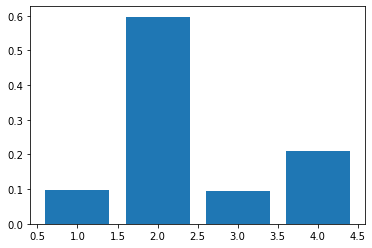

In [7]:
values,counts = np.unique(samples,return_counts = True)
plt.bar(values,counts/10000,zorder = 0)

In [8]:
'''
0    0.4
1    0.25
2    0.15
3    0.1
4    0.05
5    0.05
'''

'\n0    0.4\n1    0.25\n2    0.15\n3    0.1\n4    0.05\n5    0.05\n'

In [9]:
x = np.arange(6)
dist_target = np.array([0.4,0.25,0.15,0.1,0.05,0.05])
def c_value(p):
    dist_proposal = (1-p) **x* p
    return np.max(dist_target/dist_proposal)
p_array = np.linspace(0.001,0.009,10000)
c_array = [c_value(p) for p in p_array]
c_array = np.array(c_array)

p = p_array[np.argmin(c_array)]
c = np.min(c_array)

In [25]:
def proposal_0_5():
    u = np.random.rand()
    prop = int(np.log(u)/np.log(1-p))
    while prop>5:
        u = np.random.rand()
        prop = int(np.log(u)/np.log(1-p))
    return prop
def sampling():
    prop = proposal_0_5()
    while np.random.rand() >= dist_target[prop]/((1-p)**prop*p)/c:
        prop = proposal_0_5()
    return prop

In [26]:
sampling()

1

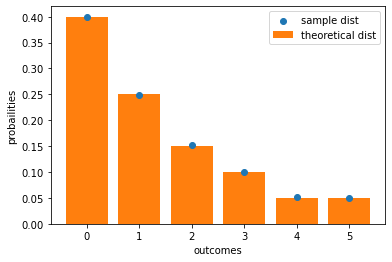

In [27]:
samples = [sampling() for i in range(10000)]
values,counts = np.unique(samples,return_counts = True)
plt.scatter(values,counts/np.sum(counts),zorder = 2, label = "sample dist")
plt.bar(np.arange(6),dist_target,label = "theoretical dist")
plt.xlabel("outcomes")
plt.ylabel("probailities")
plt.legend()
plt.show()